In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcdefaults()
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['text.color'] = '#909090'
mpl.rcParams['axes.labelcolor']= '#909090'
mpl.rcParams['xtick.color'] = '#909090'
mpl.rcParams['ytick.color'] = '#909090'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
plt.rcParams['image.cmap'] = 'jet'

In [3]:
pod_modes = np.load('POD_Modes.npy')
print(pod_modes.shape)

(44219, 5)


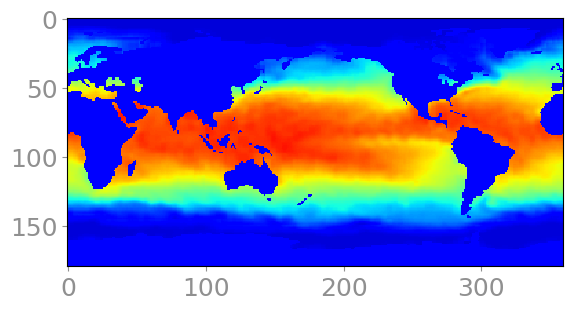

In [4]:
train_data = np.load('sst_var_train',allow_pickle=True).data
mask = np.load('mask',allow_pickle=True)
plt.imshow(train_data[0]*mask[0],vmin=-5,vmax=35)

In [5]:
train_data = train_data.reshape(427,180*360)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

train_data = train_data[:,mask]
train_data.shape

(427, 44219)

In [6]:
# Find train data mean
train_data_mean = np.mean(train_data,axis=0)

In [7]:
def visualize_predictions(cf_pred,sm,phi):
    mask = np.load('mask',allow_pickle=True)

    sst_test = np.load('sst_var_test',allow_pickle=True)
    sst_pred = np.zeros_like(sst_test)

    # Reconstruct
    prediction = sm+np.transpose(np.matmul(phi,cf_pred))
    custom_levels = np.linspace(-5.0, 35, 9)

    pnum = 0
    for t in range(0,1487):
        dpoint = 0
        for i in range(np.shape(sst_test)[1]):
            for j in range(np.shape(sst_test)[2]):
                if not mask[0,i,j] == 0:
                    sst_pred[t,i,j] = prediction[t,dpoint]
                    dpoint = dpoint + 1

    return sst_pred

In [8]:
rkhs_pred = np.load('RKHS_Test_Prediction.npy')
true_test = np.load('True_Test.npy')

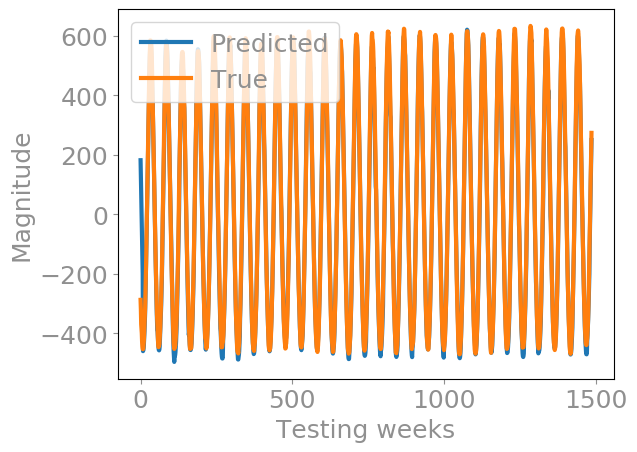

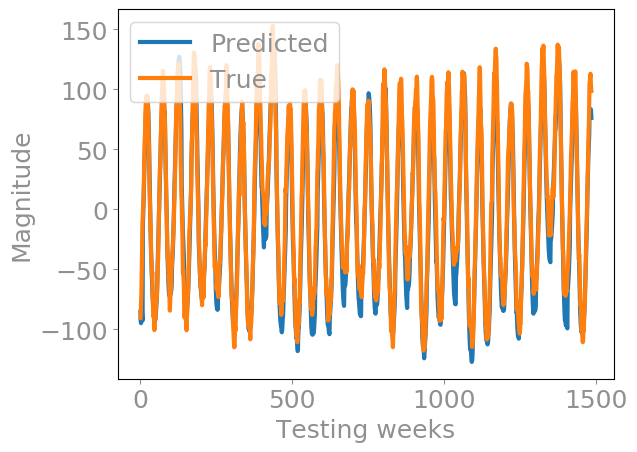

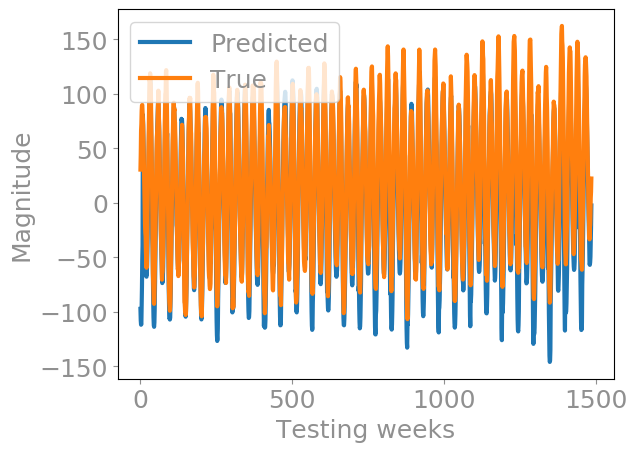

In [14]:
plt.figure()
plt.plot(rkhs_pred[0,:],label='Predicted')
plt.plot(true_test[0,:],label='True')
plt.legend(loc='upper left')
plt.ylabel('Magnitude')
plt.xlabel('Testing weeks')
plt.savefig('NOAA_C1.png')
plt.show()

plt.figure()
plt.plot(rkhs_pred[1,:],label='Predicted')
plt.plot(true_test[1,:],label='True')
plt.legend(loc='upper left')
plt.ylabel('Magnitude')
plt.xlabel('Testing weeks')
plt.savefig('NOAA_C2.png')
plt.show()

plt.figure()
plt.plot(rkhs_pred[2,:],label='Predicted')
plt.plot(true_test[2,:],label='True')
plt.legend(loc='upper left')
plt.ylabel('Magnitude')
plt.xlabel('Testing weeks')
plt.savefig('NOAA_C3.png')
plt.show()

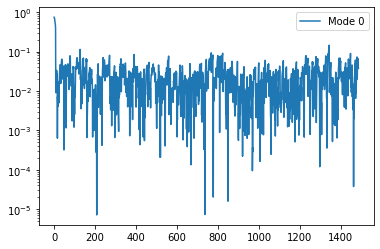

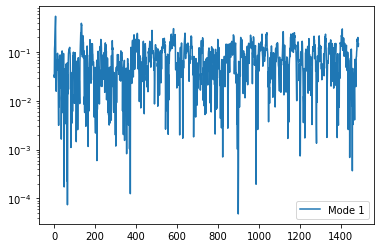

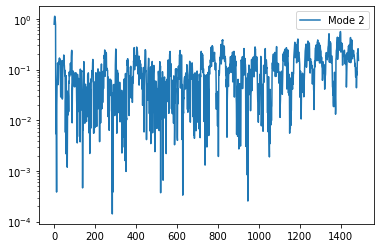

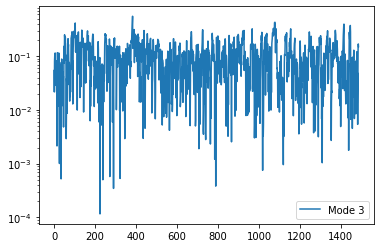

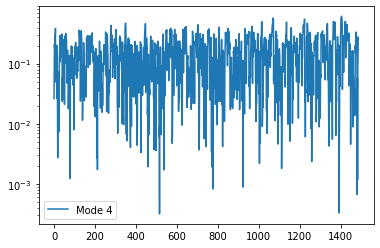

In [14]:
# RMSE plots
for i in range(5):
    plt.figure()
    plt.semilogy(np.abs(rkhs_pred[i,:]-true_test[i,:])/np.max(np.abs(true_test[i])),label='Mode '+str(i))
    plt.legend()
    plt.show()

In [16]:
rkhs_fields = visualize_predictions(rkhs_pred,train_data_mean,pod_modes)

In [17]:
rkhs_fields.shape

(1487, 180, 360)

In [18]:
np.save('RKHS_Predicted_Fields.npy',np.asarray(rkhs_fields))

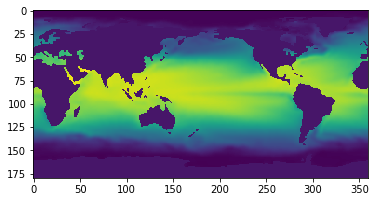

In [20]:
data_check = np.load('RKHS_Predicted_Fields.npy')
plt.imshow(data_check[-1])